<a href="https://colab.research.google.com/github/jaymordevera/traveling-salesman-problem-using-genetic-algorithm/blob/main/Traveling_Salesman_Problem_using_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**

Genetic algorithms (GAs) are a class of optimization techniques inspired by the process of natural selection.

They are particularly effective for solving complex optimization problems like route optimization, where the goal is to find the shortest or most efficient path through a series of points.

# **The Problem**

Traveling Salesman Problem (TSP) is a classic optimization problem that usually cannot be solved using traditional techniques.

The goal is to find the shortest route for a salesperson to take in visiting $N$ cities. Each city must be visited exactly once and the salesman must return to the starting point by the end of the route.

This type of problem appears in many forms, with some engineering applications that include the optimal layout of a gas pipeline, design of an antenna feed system, configuration of transistors on a very large-scale integration (VLSI) circuit, or sorting objects to match a particular configuration.

# **The Idea**

To see how GA is inspired by the process of natural selection, we take a look at its framework.

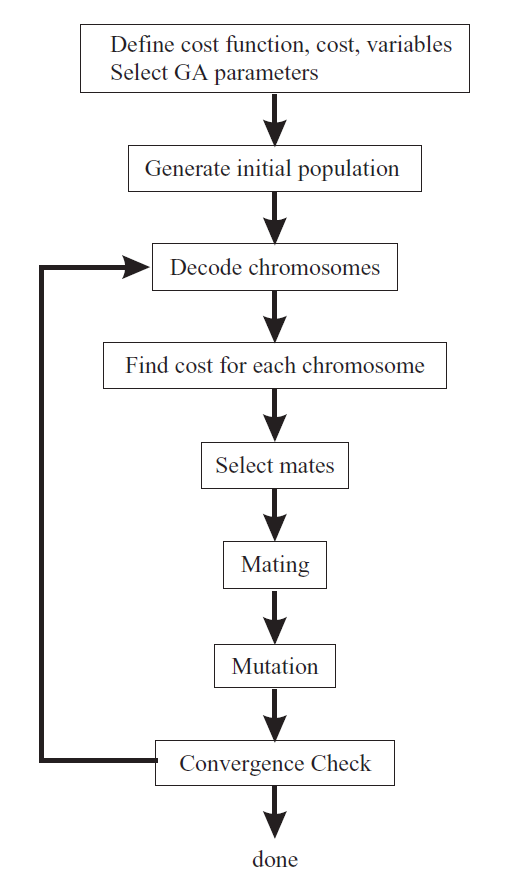

We explain each step briefly:

1.   **Definitions.** We first define the problem in which the computer would understand. This includes representation, encoding, or decoding of the variable/input; defining the fitness cost to evaluate inputs; and selecting parameters such as population size, mutation rate, crossover rate, etc.

2.   **Initial Population.** This is the $0$-th generation/iteration of the algorithm. This is typically generated randomly and consists of chromosomes (defined later).

3. **Decode Chromosomes.** The computer must be able to evaluate the chromosomes regardless of representation (binary/integer/float). Hence, we decode the chromosomes.

4. **Fitness Function Cost.** Each chromosome is evaluated using the fitness function (which we want to optimize/minimize). Ideally, we want the evaluations to be different from one another, so that we can select the *best*.

5. **Parents.** The 2 *best* solutions are typically selected as *parents* of a generation in which we will use to generate further inputs or what we call *offsprings*.

6. **Mating.** We want to intelligently produce offsprings from the best solutions. Ideally, we want some characteristics to be preserved. We sometimes called operators to do this. The most common one is called the *crossover operator*.

7. **Mutation.** To explore other solutions and not be stuck into a local extremum, we want our newly generated solutions to change direction by mutating some small percent of the population.

8. **Convergence.** This process is highly stochastic if done with no constraits. Hence, we want to implement some mechanisms that will ensure that our solution is congerging to the global extremum.

9. **Iteration.** We repeat this process of generating, evaluating, mating, and mutating until we are satisfied by the accuracy of our best yet solution. Note that we call an iteration sometimes *generation*.



# **Definitions**

We define and set-up some terms and processes for the GA.


## **Initializations**

We will use Python to implement the basic methods presented in GAs. For this, we will need several Python libraries.

In [ ]:
# Uncomment the following pip commands if any of the libraries are not found.
# !pip install numpy
# !pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
import math

print("Setup Complete!")

Setup Complete!


We set up the $N$ cities using `np.random.rand(N)` to generate random numbers over the interval $[0,1).$

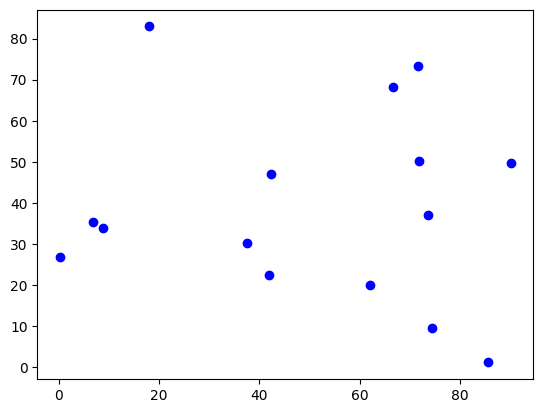

In [ ]:
# Total number of cities
N = 15

# Coordinates of each city (scaled by a factor of 100)
x = np.random.rand(N)*100
y = np.random.rand(N)*100

# Plotting the cities
plt.scatter(x,y, c='blue')
plt.show()

Imagine that each city is connected to every other city by a straight path. These paths represent the **road network**.

Suppose that point $A$ is our starting city. Our goal is to find the set of paths from point $A$ back to point $A$ that:
1.   visits each city exactly once and
2.   have the minimum distance.

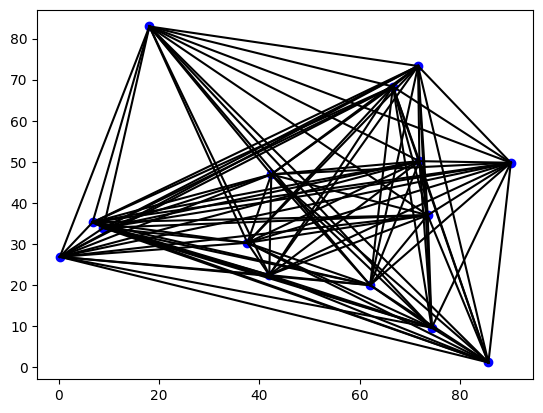

In [ ]:
# Plot of the cities
plt.scatter(x,y, c='blue')

# Plot of the paths
for i in range(N):
  for j in range(i+1,N):
    plt.plot([x[i],x[j]],[y[i],y[j]], c='black')

plt.show()

We see that as the number of cities (points) increases, the more complex the road system gets.

We denote our points based on their index. So that, `point[i] = (x[i],y[i])` for $i = 0, 1, 2, \ldots, N-1.$

Suppose that such ordering of the points exists, we denote the set of paths or route as $P = [p_0, p_1, \ldots, p_{N-1}, p_0]$ where the ordering of $p_i$ represents a path.

For example, take the route $P_0=[p_0, p_1, p_2, p_0].$ Then, the route starts at point $p_0.$ It then goes to $p_1,$ then to $p_2,$ and finally back to $p_0.$

Note that $P$ is unique up to ordering of $p_i$, i.e., $[p_0, p_1, \ldots, p_{N-1}, p_0]$ is the same as $[p_1, p_2, \ldots, p_{N-1}, p_0, p_1].$

For simplicity, we set `point[0]` to be our starting and ending point. We color it red for better visualization.

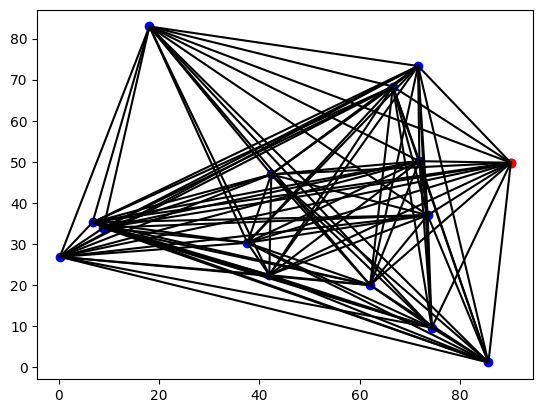

In [ ]:
# List of points
point = []
for i in range(N):
  point.append((x[i],y[i]))

# Plot of the cities
plt.scatter(x,y, c='blue')
plt.scatter(point[0][0], point[0][1], c='red')

# Plot of paths
for i in range(N):
  for j in range(i+1,N):
    plt.plot([point[i][0],point[j][0]],[point[i][1],point[j][1]], c='black')

plt.show()


## **Chromosomes**

We define the chromosomes as the variable values we aim to optimize. In this case, we want to optimize the ordering of cities to achieve minimum distance.

Our chromosome will then be an ordered list representing an element of the solution space.

For example, if there are $6$ cities, then `chromosome = [1,4,3,5,6,2,1]` represents a unique (up to reodering of internal points, i.e., excluding $1$) route.

Since we fixed our starting and ending point to be `point[0]`, then we can simply represent the route by using `chromosome = [4,3,5,6,2]`.

Route: [ 5  4 12  8  3 11 14 13  6  7  9 10  1  2]


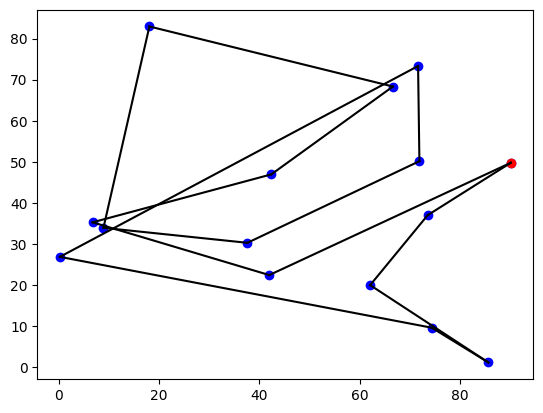

In [ ]:
# Generate a random route
p = np.arange(1,N)
np.random.shuffle(p)
print(f'Route: {p}')

# Plot of route
def plot_route(route):
  """
  Plots the route.
  """
  # Start to first internal point
  plt.plot([point[0][0],point[route[0]][0]],[point[0][1],point[route[0]][1]], c='black')

  # Internal points
  for i in range(len(p)-1):
    plt.plot([point[route[i]][0],point[route[i+1]][0]],[point[route[i]][1],point[route[i+1]][1]], c='black')

  # Start to last internal point
  plt.plot([point[route[-1]][0],point[0][0]],[point[route[-1]][1],point[0][1]], c='black')

  # Plot points
  plt.scatter(x,y, c='blue')
  plt.scatter(point[0][0], point[0][1], c='red')


plot_route(p)

plt.show()

## **Variable Enconding and Decoding**

Note that a chromosome is composed of gene. In our case, `route` is composed of `points`.

Our points is numbered $0, 1, \ldots, N-1$ to represent the $N$ cities. Note that the numbering depends on the order of generation by `np.random.rand`.

Since our route must not have duplicate points, we have a total of $\frac{N!}{2}$ possible solutions, which increased by the number of cities $N.$

## **Fitness Function**

Let $f$ be our fitness function. Note that we want to minimize the distance of a route. If $p_0 = (x_0,y_0)$ and $p_1 = (x_1,y_1)$ where $p_0 \neq p_1$ be the coordinates of two cities, then $f(p_0,p_1) = \sqrt{(x_1-x_0)^2+(y_1-y_0)^2}$ is our fitness function.

We create appropriate functions for this.

In [ ]:
def distance(p0,p1):
  """
  Returns the distance between two points.
  """
  return math.sqrt((p1[0]-p0[0])**2+(p1[1]-p0[1])**2)

def fitness(chromosome):
  """
  Returns the fitness/total distance covered of a route.
  """
  total_distance = 0

  # From starting point to the first point of the route
  total_distance += distance(point[0],point[chromosome[0]])

  # Internal points of the route
  for i in range(len(chromosome)-1):
    total_distance += distance(point[chromosome[i]],point[chromosome[i+1]])

  # From last point of the route to the ending (starting) point
  total_distance += distance(point[chromosome[-1]],point[0])

  return total_distance

As an example, let us compute the total distance of route `p` earlier.

In [ ]:
print(f'Route: {p}')
print(f'Total Distance: {fitness(p)}')

Route: [ 5  4 12  8  3 11 14 13  6  7  9 10  1  2]
Total Distance: 602.0228638286802


# **Population**

A group of chromosomes is called a *population*. The *n-th generation* is simply the particular population present at time $n.$

For example, suppose we have $4$ cities denoted $p_0, p_1, p_2, p_3$ with $p_0$ being the starting city. Then, the routes

$$[p_0, p_1, p_2, p_3, p_0] \\ [p_0, p_2, p_1, p_3, p_0] \\ [p_0, p_1, p_3, p_2, p_0] \\ [p_0, p_2, p_3, p_1, p_0]$$

is called a population. Assume that this is the initial population, then we call it the $0$-th generation.

We can choose how many chromosomes are present in a population. Here, we denote it as `POPULATION_SIZE`.

Route: [5, 14, 8, 1, 4, 7, 10, 6, 2, 11, 12, 3, 9, 13]


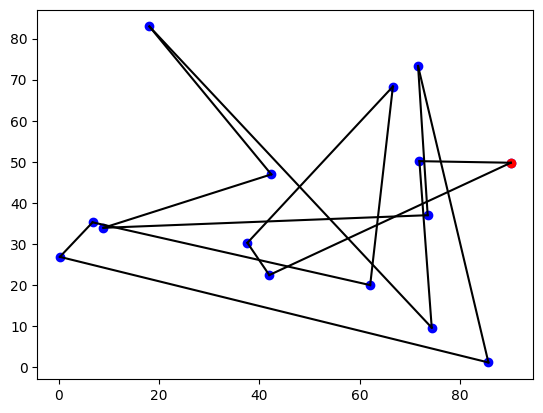

Route: [6, 14, 3, 7, 8, 9, 13, 10, 2, 5, 1, 11, 4, 12]


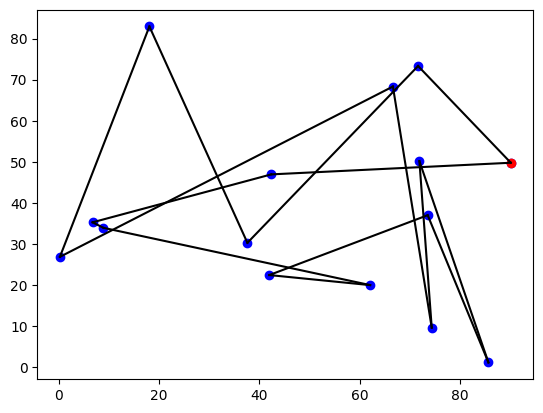

Route: [3, 4, 6, 1, 9, 13, 2, 11, 14, 12, 7, 8, 5, 10]


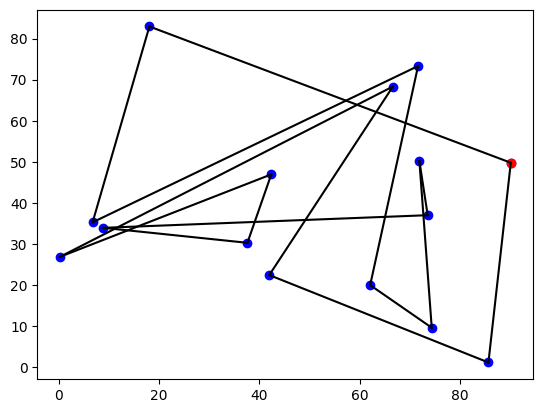

Route: [1, 4, 5, 11, 12, 9, 13, 14, 3, 6, 2, 10, 8, 7]


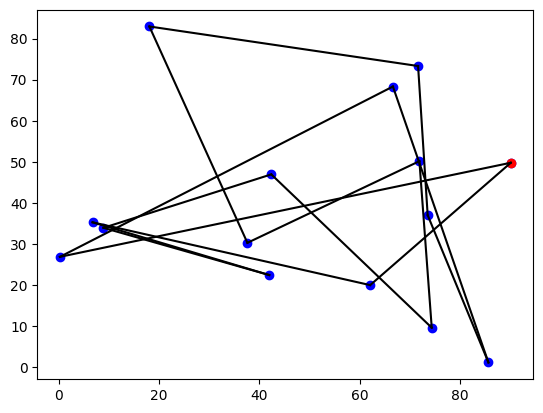

In [ ]:
# Population size (make sure that it does not exceed the cardinality of the solution space)
POPULATION_SIZE = 4

# Generate the initial random population
def initial_population(POPULATION_SIZE):
  """
  Returns an initial population of chromosomes.
  """
  population = []
  for i in range(POPULATION_SIZE):
    p = np.arange(1,N)
    np.random.shuffle(p)
    population.append(list(p))

  return population

population = initial_population(POPULATION_SIZE)

# Plot of the initial random population
for i in population:
  print(f'Route: {i}')
  plot_route(i)
  plt.show()


# **Evaluation**

We evaluate the population using the defined fitness functions.

In [ ]:
for i in range(len(population)):
  print(f'Route: {population[i]}')
  print(f'Total Distance: {fitness(population[i])}')
  print()

Route: [5, 14, 8, 1, 4, 7, 10, 6, 2, 11, 12, 3, 9, 13]
Total Distance: 723.1867936143875

Route: [6, 14, 3, 7, 8, 9, 13, 10, 2, 5, 1, 11, 4, 12]
Total Distance: 664.497423364254

Route: [3, 4, 6, 1, 9, 13, 2, 11, 14, 12, 7, 8, 5, 10]
Total Distance: 713.0702602115913

Route: [1, 4, 5, 11, 12, 9, 13, 14, 3, 6, 2, 10, 8, 7]
Total Distance: 761.7653726711176



We see that population has various fitness value. In this generation, we note that there exists chromosomes that have the two least fitness value.

# **Parents**

We select these two chromosomes to continue the gene and create new offsprings for our next generation population.

Note that it is common to have a `KEEP_RATE` of $50\%$, that is, the number of parents/chromosomes to continue on the next generation. There are several ways to choose the parents in case there are more than 2. Also, there could be multiple pairs of chromosomes chosen for mating and produce new offsprings.

In our case, we simply choose the $2$ best and ditch the rest.

# **Mating**

Mating is the creation of one or more offspring from the parents selected
in the pairing process. The genetic makeup is limited by the current member of the population. Usually, the offsprings are produced by the crossover operator; however, this is not appropriate.

Crossover operator is picking some random position in the gene of the parents, slice it, and crisscross it to produce two new offsprings.

However, in this case, it would produce duplicates (route visiting a city not exactly once). To solve this, we use some variation of the idea called **cycle crossover** *(CX)*.

Here, we randomly select a location in the chromosome where the integers are exchanged between the two parents. Unless the exchanged integers are the same, each offspring has a duplicate integer. Next the repeated integer in `offspring1` is switched with the integer at that site in `offspring2`. Now a different integer is duplicated, so the process iterates until we return to the first exchanged site.

We define some functions for these tasks.

In [ ]:
def select_parents(population):
  """
  Returns the two best chromosomes in the population.
  """
  score = dict()

  for i in range(len(population)):
    score[fitness(population[i])] = population[i]

  score = dict(sorted(score.items()))
  return list(score.values())[:2]


def mating(parent1, parent2):
  """
  Return the valid offsprings produced by the parents
  """
  cut = np.random.randint(0,len(parent1)-1)
  offspring1 = []
  offspring2 = []

  offspring1 = parent1[0:cut]
  offspring1 += [city for city in parent2 if city not in offspring1]


  offspring2 = parent2[0:cut]
  offspring2 += [city for city in parent1 if city not in offspring2]


  return [offspring1, offspring2]


parents = select_parents(population)
offsprings = mating(parents[0], parents[1])

print(f'Parents: {parents}')
print(f'Offsprings: {offsprings[0]}, {offsprings[1]}')




Parents: [[6, 14, 3, 7, 8, 9, 13, 10, 2, 5, 1, 11, 4, 12], [3, 4, 6, 1, 9, 13, 2, 11, 14, 12, 7, 8, 5, 10]]
Offsprings: [6, 3, 4, 1, 9, 13, 2, 11, 14, 12, 7, 8, 5, 10], [3, 6, 14, 7, 8, 9, 13, 10, 2, 5, 1, 11, 4, 12]


# **Mutation**

The mutation operator randomly chooses a string, selecting two random sites within that string, and exchanges the integers at those sites.

We choose a constant to be our `MUTATION_RATE`. In our case, $0.01$ or $1\%$ should be enough.

In [ ]:
MUTATION_RATE = 0.01

def mutate(offsprings):
  """
  Returns the mutated offsprings based on the mutation rate.
  """
  if np.random.random() < MUTATION_RATE:
    size = len(offsprings)
    index1 = np.random.randint(0,size-1)
    index2 = np.random.randint(0,size-1)
    while index1 == index2:
      index2 = np.random.randint(0,size-1)
    offsprings[index1], offsprings[index2] = offsprings[index2], offsprings[index1]

  return offsprings

mutated_offsprings = mutate(offsprings)
print(f'Mutated Offsprings: {mutated_offsprings}')

Mutated Offsprings: [[6, 3, 4, 1, 9, 13, 2, 11, 14, 12, 7, 8, 5, 10], [3, 6, 14, 7, 8, 9, 13, 10, 2, 5, 1, 11, 4, 12]]


# **Convergence and Iteration**

We now implement GA and iterate through the process.

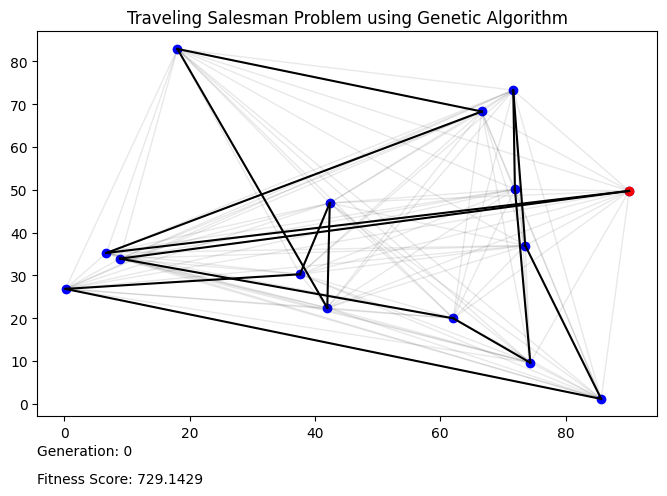

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

def genetic_algorithm():
  GENERATIONS = 35
  POPULATION_SIZE = 4
  MUTATION_RATE = 1

  population = initial_population(POPULATION_SIZE)
  best_route = population[0]
  best_cost = fitness(best_route)

  solutions = [(population[0], 0)]

  for gen in range(GENERATIONS):
    parents = select_parents(population)
    offsprings = mating(parents[0], parents[1])
    mutated_offsprings = mutate(offsprings)
    new_population = parents + mutated_offsprings
    population = new_population

    # Best Route
    score = dict()

    for i in range(len(population)):
      score[fitness(population[i])] = population[i]

    score = dict(sorted(score.items()))
    best_route = list(score.values())[0]

    # Storing best solutions
    solutions.append((best_route,gen+1))

  return solutions


def main():
  solutions = genetic_algorithm()

  fig, ax = plt.subplots(figsize=(8,5))

  def plot_best(sol):
    """
    Plots the best route in the population.
    """
    best_route = sol[0]
    generation = sol[1]

    ax.clear()

    # Plot of the best route
    for i in range(len(x)):
      for j in range(i + 1, len(x)):
          plt.plot([x[i], x[j]], [y[i], y[j]], 'k-', alpha=0.09, linewidth=1)

    plot_route(best_route)
    plt.annotate(f'Generation: {generation}', (0, 0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')
    plt.annotate(f'Fitness Score: {round(fitness(best_route), 4)}', (0, 0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
    plt.title(f"Traveling Salesman Problem using Genetic Algorithm")

  anim = FuncAnimation(fig, plot_best, frames=solutions)
  anim.save('TSPGA.mp4', writer='ffmpeg', dpi=300)


if __name__ == '__main__':
  main()


# **Credits and References**

References
1.   Haput, R.L., Haupt, S.E. (20004). *Practical Genetic Algorithms*. Second Edition. John Wiley & Sons, Inc.
2.   Shendy, R. (2023). *Traveling Salesman Problem (TSP) using Genetic Algorithm (Python)*. Medium. https://medium.com/aimonks/traveling-salesman-problem-tsp-using-genetic-algorithm-fea640713758

Credits
1. https://github.com/GuintherKovalski/Travelling-Salesman-Problem
2. https://www.youtube.com/watch?v=CRtZ-APJEKI&t=1222s

